In this tutorial notebook, you will learn the basics of unstructured data (text, audio, image) pre-processing with a hands-on approach.

By the end of this tutorial, you will be able to pre-process unstructured data effectively and prepare it for further analysis.

# **1. Text Preprocessing**

Text preprocessing is the process of cleaning and transforming unstructured text data into a format that can be understood by machines.

Text preprocessing is an essential step in many AI applications, such as Natural language processing (NLP) - sentiment analysis, machine translation, and question answering, text classification.


In [ ]:
# install the required library for text processing : NLTK
!pip install nltk

##  Tokenization

 Splitting the text into individual words or tokens.

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

sentence = "The grapes are in the fridge"

words = word_tokenize(sentence)
print(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['The', 'grapes', 'are', 'in', 'the', 'fridge']


## Normalization

Converting a word to lower case

In [ ]:
sentence = sentence.lower()
print(sentence)

the grapes are in the fridge


## Removing stop words

Removing common words that do not add much meaning to the text, such as "the", "a", and "of".

In [ ]:
#stop words removal
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

sentence = "Generative AI is cool but can be dangerous, too!"

stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(sentence)

filtered_sentence = [w for w in word_tokens if not w in stop_words]
print(filtered_sentence)

['Generative', 'AI', 'cool', 'dangerous', ',', '!']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Stemming

Reducing words to their root form, such as "running" to "run".

In [ ]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

sentence = "We are discussing about machine learning in medical imaging"

for word in sentence.split():
  print(ps.stem(word))

we
are
discuss
about
machin
learn
in
medic
imag


## Lemmatization

Reducing words to their dictionary form, such as "running" to "run" and "ate" to "eat".

In [ ]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize with POS Tag  pos: parts of speech tag, verb
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Tokenize: Split the sentence into words
word_list = nltk.word_tokenize(sentence)

# Lemmatize list of words and join
#lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(sentence)])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


['We', 'be', 'discuss', 'about', 'machine', 'learn', 'in', 'medical', 'image']


# 2. Audio Preprocessing

Audio preprocessing is the process of cleaning and transforming audio data into a format that can be understood by machines. This involves a variety of tasks, such as noise reduction, segmentation, and normalization. We will cover some examples of those techniques.

Audio preprocessing is an essential step in many AI applications, such as speech recognition, voice cloning, text-to-speech, music genre classification, and audio tagging.

In [ ]:
# install the required dataset
!pip install datasets[audio]

#install the required library for audio processing
!pip install librosa
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.5 MB/s eta 0:00:00


## Resample audio data

Audio resampling is the process of changing the sample rate of an audio signal. This can be done to increase or decrease the playback speed of an audio file, or to convert an audio file from one sample rate to another.When an audio signal is resampled, the original signal is divided into smaller or larger chunks, and the values of these chunks are interpolated to create a new signal with the desired sample rate.

Most of the available pretrained models have been pretrained on audio datasets at a sampling rate of 16 kHz. When we explored MINDS-14 dataset, which was sampled at 8 kHz- it means that we need to upsample it using `cast_column` method. This operation signals to datasets to resample the audio examples on the fly when they are loaded.

In [ ]:
from datasets import Audio
from datasets import load_dataset

#load MINDS-14 dataset
minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")

# set the sampling rate to 16kHz
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
#Re-load the first audio sample and check that it has been resampled to 16K
minds[0]

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-AU~PAY_BILL/response_4.wav',
 'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/a19fbc5032eacf25eab0097832db7b7f022b42104fbad6bd5765527704a428b9/en-AU~PAY_BILL/response_4.wav',
  'array': array([2.36119668e-05, 1.92324660e-04, 2.19284790e-04, ...,
         9.40907281e-04, 1.16613181e-03, 7.20883254e-04]),
  'sampling_rate': 16000},
 'transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'english_transcription': 'I would like to pay my electricity bill using my card can you please assist',
 'intent_class': 13,
 'lang_id': 2}

## Filtering the audio dataset

We might want to filter out any examples longer than 20s to prevent out-of-memory errors when training a model by using `filter` method.

In [ ]:
# Filter out any examples longer than 20s to prevent out-of-memory errors when training a model
MAX_DURATION_IN_SECONDS = 20.0

def is_audio_length_in_range(input_length):
    return input_length < MAX_DURATION_IN_SECONDS

import librosa

# use librosa to get example's duration from the audio file
new_column = [librosa.get_duration(path=x) for x in minds["path"]]
minds = minds.add_column("duration", new_column)

# use filter method to apply the filtering function
minds = minds.filter(is_audio_length_in_range, input_columns=["duration"])

# remove the temporary helper column
minds = minds.remove_columns(["duration"])
minds

Filter:   0%|          | 0/654 [00:00<?, ? examples/s]

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 624
})

## Feature Extraction

Preparing the audio data in the right format for model training is challenging. Raw audio data comes as an array of sample values. However, pre-trained models, whether you use them for inference, or want to fine-tune them for your task, expect the raw data to be converted into input features (may vary from one model to another).

`Transformer` offer a feature extractor class that can convert raw audio data into the input features the model expects.

`Whisper feature extractor `pads/truncates a batch of audio examples such that all examples have an input length of 30s. Then it converts the padded audio arrays to log-mel spectrograms. As you recall, these spectrograms describe how the frequencies of a signal change over time, expressed on the mel scale and measured in decibels (the log part).

In [ ]:
#audio preprocessing

from transformers import WhisperFeatureExtractor

# pad and convert audio to log-mel-spectograms (as the model required)
feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")

#we now have log-mel spectrograms as input_features in the dataset.
def prepare_dataset(example):
    audio = example["audio"]
    features = feature_extractor(
        audio["array"], sampling_rate=audio["sampling_rate"], padding=True
    )
    return features

minds = minds.map(prepare_dataset)

Map:   0%|          | 0/624 [00:00<?, ? examples/s]

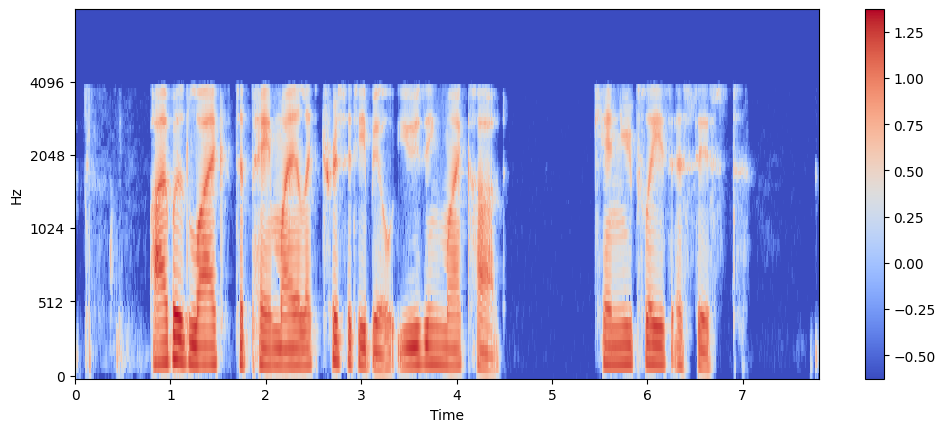

In [ ]:
#visualize it for one of the examples in the minds dataset
import numpy as np
import matplotlib.pyplot as plt

example = minds[0]
input_features = example["input_features"]

plt.figure().set_figwidth(12)
librosa.display.specshow(
    np.asarray(input_features[0]),
    x_axis="time",
    y_axis="mel",
    sr=feature_extractor.sampling_rate,
    hop_length=feature_extractor.hop_length,
)
plt.colorbar()

# 3. Image Pre-processing

Image pre-processing is the process of preparing images for analysis by machine learning algorithms. This involves a variety of tasks, such as noise reduction, contrast enhancement, image resizin, image cropping and normalization.

Image pre-processing is an essential step in many AI applications, such as object detection, image classification, medical image analysis, and face recognition.

In [ ]:
#install the required library for image preprocessing
!pip install --u pillow
!pip install torchvision


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

ambiguous option: --u (--upgrade, --upgrade-strategy, --use-deprecated, --use-feature, --use-pep517, --user?)


## Image resizing

Mostly, the ML models require all input images to be the same size (for example, 256x256 or 512x512 pixels)


(453, 453)


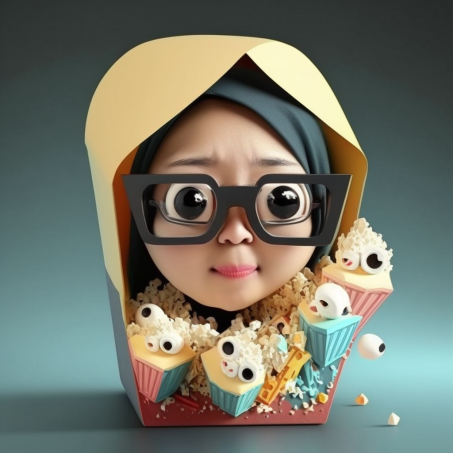

In [ ]:
from PIL import Image

image = Image.open('/content/nyoo.png')

# Image size, in pixels. The size is given as a 2-tuple (width, height).
print(image.size)

image.show()


In [ ]:
# Image size, in pixels. The size is given as a 2-tuple (width, height).
new_image = image.resize((256,256))
print(new_image.size)

(256, 256)


## Image Transformation

Image transformation is a process of applying a set of operations to an image to prepare it for further processing. In PyTorch, image transformation is implemented in the `torchvision.transforms` module. This module provides a set of common image transformations, such as resize, crop, flip, rotate and color transformation.

In [ ]:
import io
import requests
import torchvision.transforms as T

preprocess = T.Compose([
   T.Resize(256),
   T.CenterCrop(224),
   T.ToTensor()
])

x = preprocess(image)
x.shape

torch.Size([3, 224, 224])

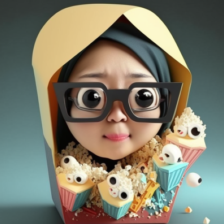

In [ ]:
# show the pre-processed image with image transformation
transform = T.ToPILImage()
img = transform(x)
img.show()